In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\OneDrive\工作\学习\第五学期\投资学\投资学 案例研究\投资学 案研三\投资学 案研三 代码&数据'))
	print(os.getcwd())
except:
	pass


In [94]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rcParams.update({"font.size": 11})
import numpy as np
import statsmodels.api as sm
from IPython.display import display
import seaborn as sns

In [95]:
path = os.getcwd()


In [96]:
data = pd.read_csv(
    open(
        path + "\\FamaFrench.csv", 
        'r', 
        encoding = "utf-8"
    ), 
    index_col = [0]
)
data.index = pd.to_datetime(data.index, format = '%b-%y').strftime('%Y-%m')


# 收益率
可以看到，动量因子的收益率远高于其它因子，尤其是在2015年中。其余因子的收益率表现相差不大，均值都低于0。

Text(0.5,1,'Return of Factors')

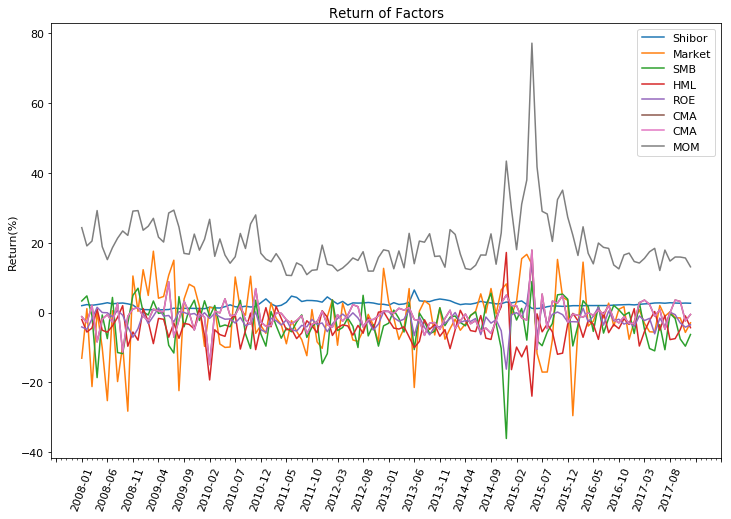

In [97]:
plt.figure(figsize = (12, 8))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xticks(rotation = 70)
plt.plot(data.index, data["Shibor"], label = "Shibor")
plt.plot(data.index, data["Market"], label = "Market")
plt.plot(data.index, data["SMB"], label = "SMB")
plt.plot(data.index, data["HML"], label = "HML")
plt.plot(data.index, data["ROE"], label = "ROE")
plt.plot(data.index, data["CMA"], label = "CMA")
plt.plot(data.index, data["CMA"], label = "CMA")
plt.plot(data.index, data["MOM"], label = "MOM")
plt.legend()
plt.ylabel("Return(%)")
plt.title("Return of Factors")


In [98]:
data.describe()


,Shibor,Market,SMB,HML,ROE,CMA,MOM,ME0BP/ME0,ME0BP/ME1,ME0BP/ME2,...,ME3BP/ME0,ME3BP/ME1,ME3BP/ME2,ME3BP/ME3,ME3BP/ME4,ME4BP/ME0,ME4BP/ME1,ME4BP/ME2,ME4BP/ME3,ME4BP/ME4
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2.391529,-1.855738,-3.077592,-4.464530,-2.133120,-0.963855,19.761993,1.008261,1.955028,1.370350,...,3.429022,2.016191,1.251269,0.944828,0.169971,1.822424,1.283657,0.737379,0.858019,0.594896
std,0.889648,8.989121,5.958622,4.553039,2.819122,3.803802,8.325334,12.296683,11.243288,10.939357,...,11.617774,10.062271,10.110783,9.676866,10.462176,8.899916,8.859831,8.948340,9.517984,8.379035
min,0.803582,-29.535931,-36.079260,-23.947787,-16.207890,-14.895867,10.611562,-33.402062,-28.064675,-27.281167,...,-26.153475,-27.788724,-29.228434,-26.606699,-33.810168,-23.159387,-26.306371,-26.114162,-38.316659,-22.846653
25%,1.866313,-6.722316,-6.071562,-6.560288,-3.512013,-2.847319,14.612304,-7.055425,-4.138159,-5.241199,...,-3.417397,-2.853172,-4.533499,-3.820612,-4.524505,-2.127014,-3.120529,-3.796195,-3.836762,-2.893326
50%,2.413980,-1.355685,-2.925407,-4.442765,-1.914440,-1.000553,17.552181,1.931556,2.826351,2.166937,...,3.307419,2.289537,1.030635,1.178453,0.783639,2.322379,1.634254,0.980235,1.078331,0.000000
75%,2.806922,2.844453,0.813304,-1.964928,-0.589128,0.741648,22.609008,8.498865,9.345521,8.946219,...,8.979170,7.767651,6.670173,5.991107,5.314289,6.284829,6.242009,5.657540,6.452781,3.591928
max,6.468176,17.584159,8.897063,17.213223,14.100332,17.898765,77.189281,38.613598,33.006385,28.150208,...,63.994714,30.186271,25.734768,23.044266,23.902885,28.616988,19.939676,19.640558,23.015904,33.173794


# 统计报告

## 因子间相关性
因子间的相关性比较大，这使得模型可能出现过拟合。其中HML和SMB、ROE和SMB等因子间的相关性特别高。如图为SMB和HML的图例。

In [99]:
factors = list(data.columns[1:7])
correlation = pd.DataFrame(index = factors, columns = factors)
for factor_x in factors:
    for factor_y in factors:
        correlation.loc[factor_x, factor_y] = np.corrcoef(
            data[factor_x], data[factor_y]
        )[0][1]
correlation


,Market,SMB,HML,ROE,CMA,MOM
Market,1,0.209565,-0.0927207,0.14921,0.0843781,0.292963
SMB,0.209565,1,-0.634243,0.445343,0.101804,0.0489041
HML,-0.0927207,-0.634243,1,-0.554817,-0.230356,-0.298643
ROE,0.14921,0.445343,-0.554817,1,0.381226,0.312093
CMA,0.0843781,0.101804,-0.230356,0.381226,1,0.325905
MOM,0.292963,0.0489041,-0.298643,0.312093,0.325905,1


C:\Users\KasperLin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


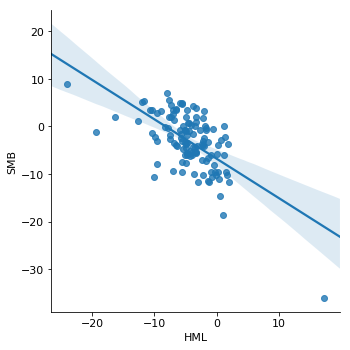

In [100]:
sns.lmplot("HML", "SMB", data)


## 因子参数
在25个分组的被解释变量中，因子的系数值相差不大，模型对不同风格的投资组合的解释性比较强。

其中系数相对较大的有 $\beta$ 和SMB。

In [101]:
for factor in factors:
    parameters = pd.DataFrame(
        index = ["ME" + str(i) for i in range(5)], 
        columns = ["BP/ME" + str(i) for i in range(5)]
    )
    parameters.index.name = "Parameters of " + factor
    for i in range(5):
        for j in range(5):
            y = list(data["ME" + str(i) + "BP/ME" + str(j)])
            x = data.loc[:, ["Market", "SMB", "HML", "ROE", "CMA", "MOM"]]
            x = sm.add_constant(x)
            result = sm.OLS(y, x).fit()
            parameters.iloc[i, j] = result.params[factor]
    display(parameters)


,BP/ME0,BP/ME1,BP/ME2,BP/ME3,BP/ME4
Parameters of Market,,,,,
ME0,0.867798,0.954924,0.974331,0.979715,0.980055
ME1,1.19712,0.977376,0.957166,0.99702,0.965787
ME2,0.945279,0.959621,0.985954,0.980829,1.01982
ME3,0.958946,0.978101,1.01205,0.967981,1.0362
ME4,0.990674,0.961661,0.929131,0.894574,0.50414


,BP/ME0,BP/ME1,BP/ME2,BP/ME3,BP/ME4
Parameters of SMB,,,,,
ME0,0.664091,0.634175,0.6801,0.689715,0.74757
ME1,0.258911,0.538432,0.631858,0.62808,0.612195
ME2,0.385357,0.499577,0.461215,0.503583,0.485738
ME3,0.31488,0.335749,0.339914,0.341517,0.337191
ME4,-0.397422,0.0559186,0.156901,0.354964,0.17058


,BP/ME0,BP/ME1,BP/ME2,BP/ME3,BP/ME4
Parameters of HML,,,,,
ME0,-0.26993,-0.232197,-0.277019,-0.272601,-0.116404
ME1,-0.535953,-0.307404,-0.29492,-0.181761,-0.0434219
ME2,-0.435256,-0.33188,-0.224385,-0.110043,-0.0203734
ME3,-0.462639,-0.243726,-0.139721,-0.00745412,0.0236496
ME4,-0.0803079,0.00436166,0.0991214,0.00826293,0.248404


,BP/ME0,BP/ME1,BP/ME2,BP/ME3,BP/ME4
Parameters of ROE,,,,,
ME0,-0.0714338,-0.180247,-0.232274,-0.233144,-0.307697
ME1,0.056254,-0.150716,-0.195001,-0.235455,-0.255153
ME2,0.164715,0.111427,-0.017946,-0.187848,-0.10422
ME3,0.344105,-0.00635785,-0.0999213,-0.107588,-0.181713
ME4,-0.216302,-0.314271,-0.213597,-0.599742,0.361561


,BP/ME0,BP/ME1,BP/ME2,BP/ME3,BP/ME4
Parameters of CMA,,,,,
ME0,0.221675,0.0308073,-0.105353,-0.103722,-0.144487
ME1,0.788502,0.02195,-0.111002,-0.0910957,-0.190789
ME2,0.155096,0.0577716,-0.140786,-0.220825,-0.227886
ME3,0.0375978,-0.138268,-0.183225,-0.0930839,-0.164146
ME4,-0.0395123,-0.0957973,-0.198382,-0.124738,0.1518


,BP/ME0,BP/ME1,BP/ME2,BP/ME3,BP/ME4
Parameters of MOM,,,,,
ME0,-0.00663301,0.065835,0.0145879,0.0447514,-0.0217623
ME1,0.240024,0.0407343,0.0817047,0.0215547,0.0120818
ME2,0.290549,0.164411,0.0707371,0.0725438,-0.0110558
ME3,0.257564,0.0754927,0.0588984,0.0419781,0.0459216
ME4,0.0536254,0.0322691,0.0779608,-0.0157946,0.113555


## 因子 t 值

因子的 t 值指出其统计显著性。大部分的因子都至少在部分投资组合上展现出显著性。尤其是 Market 和 SMB 因子。

In [102]:
for factor in factors:
    tvalues = pd.DataFrame(
        index = ["ME" + str(i) for i in range(5)], 
        columns = ["BP/ME" + str(i) for i in range(5)]
    )
    tvalues.index.name = "t values of " + factor
    for i in range(5):
        for j in range(5):
            y = list(data["ME" + str(i) + "BP/ME" + str(j)])
            x = data.loc[:, ["Market", "SMB", "HML", "ROE", "CMA", "MOM"]]
            x = sm.add_constant(x)
            result = sm.OLS(y, x).fit()
            tvalues.iloc[i, j] = result.tvalues[factor]
    display(tvalues)


,BP/ME0,BP/ME1,BP/ME2,BP/ME3,BP/ME4
t values of Market,,,,,
ME0,10.6818,20.6589,34.4647,42.1113,51.5871
ME1,11.983,27.4279,41.7368,49.9473,49.126
ME2,20.5538,30.6262,38.6488,43.6412,44.3118
ME3,27.1477,43.9395,44.4794,34.4893,26.5138
ME4,71.6488,47.4764,34.1189,17.9613,6.94176


,BP/ME0,BP/ME1,BP/ME2,BP/ME3,BP/ME4
t values of SMB,,,,,
ME0,4.23045,7.10037,12.4501,15.3427,20.3646
ME1,1.34126,7.81979,14.2588,16.2838,16.1158
ME2,4.33639,8.25143,9.35655,11.596,10.9227
ME3,4.61336,7.80583,7.73138,6.29743,4.46516
ME4,-14.8752,1.42871,2.98179,3.68841,1.21557


,BP/ME0,BP/ME1,BP/ME2,BP/ME3,BP/ME4
t values of HML,,,,,
ME0,-1.23761,-1.87112,-3.64992,-4.36448,-2.28226
ME1,-1.9983,-3.21327,-4.79007,-3.39168,-0.822708
ME2,-3.52519,-3.94531,-3.27626,-1.82378,-0.329735
ME3,-4.87852,-4.0783,-2.2873,-0.0989283,0.225402
ME4,-2.16343,0.0802073,1.35579,0.0617962,1.27404


,BP/ME0,BP/ME1,BP/ME2,BP/ME3,BP/ME4
t values of ROE,,,,,
ME0,-0.230366,-1.02163,-2.15257,-2.6255,-4.24329
ME1,0.147527,-1.1081,-2.2277,-3.09033,-3.40032
ME2,0.938322,0.93169,-0.184304,-2.18977,-1.18641
ME3,2.55222,-0.0748289,-1.15054,-1.00431,-1.21816
ME4,-4.09853,-4.06488,-2.05495,-3.15481,1.30433


,BP/ME0,BP/ME1,BP/ME2,BP/ME3,BP/ME4
t values of CMA,,,,,
ME0,1.12299,0.274299,-1.53373,-1.83486,-3.13006
ME1,3.24836,0.253512,-1.99202,-1.87819,-3.99408
ME2,1.38792,0.758823,-2.27128,-4.04374,-4.07517
ME3,0.438061,-2.55638,-3.31416,-1.36498,-1.72859
ME4,-1.1761,-1.94644,-2.99815,-1.03075,0.860246


,BP/ME0,BP/ME1,BP/ME2,BP/ME3,BP/ME4
t values of MOM,,,,,
ME0,-0.0695116,1.2126,0.439319,1.63767,-0.975252
ME1,2.04552,0.973221,3.03319,0.91933,0.52322
ME2,5.37863,4.46731,2.36073,2.74805,-0.408986
ME3,6.2079,2.88733,2.20384,1.27339,1.00038
ME4,3.30194,1.35632,2.43733,-0.269993,1.33121


## 因子的$R^2$

$R^2$ 统计模型对数据的解释性，可以看到模型的解释性良好，在不同被解释变量中的平均值高达89.61%。最好的有92.82%，最差的也有41.72%。

In [103]:
rsquared = pd.DataFrame(
    index = ["ME" + str(i) for i in range(5)], 
    columns = ["BP/ME" + str(i) for i in range(5)]
)
rsquared.index.name = "R square of Regression"
for i in range(5):
    for j in range(5):
        y = list(data["ME" + str(i) + "BP/ME" + str(j)])
        x = data.loc[:, ["Market", "SMB", "HML", "ROE", "CMA", "MOM"]]
        x = sm.add_constant(x)
        result = sm.OLS(y, x).fit()
        rsquared.iloc[i, j] = result.rsquared
display(rsquared)


,BP/ME0,BP/ME1,BP/ME2,BP/ME3,BP/ME4
R square of Regression,,,,,
ME0,0.661378,0.868877,0.948189,0.965211,0.975375
ME1,0.704905,0.916986,0.964788,0.972813,0.970637
ME2,0.88557,0.939514,0.954096,0.96243,0.960961
ME3,0.928284,0.962033,0.960712,0.934741,0.891747
ME4,0.981275,0.959451,0.928151,0.787573,0.417204


## 因子修正后的$R^2$
修正后的$R^2$有相似的表现。平均值达到89.06%。

In [104]:
rsquared_adj = pd.DataFrame(
    index = ["ME" + str(i) for i in range(5)], 
    columns = ["BP/ME" + str(i) for i in range(5)]
)
rsquared_adj.index.name = "Adjusted R square of Regression"
for i in range(5):
    for j in range(5):
        y = list(data["ME" + str(i) + "BP/ME" + str(j)])
        x = data.loc[:, ["Market", "SMB", "HML", "ROE", "CMA", "MOM"]]
        x = sm.add_constant(x)
        result = sm.OLS(y, x).fit()
        rsquared_adj.iloc[i, j] = result.rsquared_adj
display(rsquared_adj)


,BP/ME0,BP/ME1,BP/ME2,BP/ME3,BP/ME4
Adjusted R square of Regression,,,,,
ME0,0.643398,0.861915,0.945438,0.963364,0.974067
ME1,0.689236,0.912578,0.962918,0.971369,0.969078
ME2,0.879495,0.936302,0.951659,0.960435,0.958888
ME3,0.924476,0.960017,0.958626,0.931276,0.885999
ME4,0.980281,0.957298,0.924336,0.776293,0.386259


## 回归报告
取其中一个被解释变量展示回归结果。

In [105]:
y = list(data["ME4BP/ME0"])
x = data.loc[:, ["Market", "SMB", "HML", "ROE", "CMA", "MOM"]]
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     987.0
Date:                Wed, 19 Dec 2018   Prob (F-statistic):           3.99e-95
Time:                        11:11:08   Log-Likelihood:                -193.42
No. Observations:                 120   AIC:                             400.8
Df Residuals:                     113   BIC:                             420.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5200      0.398      1.306      0.1

## 因子回归图

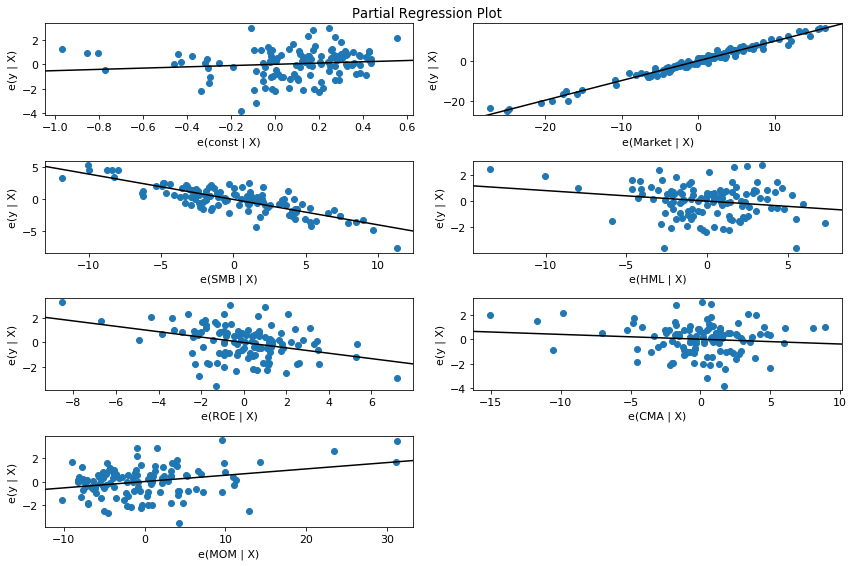

In [106]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_partregress_grid(result, fig = fig)